# EDA Diabetes Analysis

---------------
## Context
---------------

Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients are growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

A few years ago research was done on a tribe in America which is called the Pima tribe. In this tribe, it was found that the ladies are prone to diabetes very early. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients were females at least 21 years old of Pima tribe. 

-----------------
## Objective
-----------------

Here, we are analyzing different aspects of Diabetes in the Pima Diabetes Analysis by doing Exploratory Data Analysis.

-------------------------
## Data Dictionary
-------------------------

The dataset has the following information:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: A function that scores the likelihood of diabetes based on family history.
* Age: Age in years
* Outcome: Class variable (0: a person is not diabetic or 1: a person is diabetic)

## Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Read the data

In [3]:
pima = pd.read_csv("diabetes.csv")

Show the last 10 records of the dataset.

In [4]:
pima.tail(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,20,79,37.5,0.197,26,0
759,6,190,92,20,79,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,79,44.0,0.403,43,1
762,9,89,62,20,79,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,79,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,20,79,30.1,0.349,47,1
767,1,93,70,31,79,30.4,0.315,23,0


In [5]:
#Column Count not including index
len(pima.columns)

9

In [6]:
pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33.600000,0.627,50,1
1,1,85,66,29,79,26.600000,0.351,31,0
2,8,183,64,20,79,23.300000,0.672,32,1
3,1,89,66,23,94,28.100000,0.167,21,0
4,0,137,40,35,168,43.100000,2.288,33,1
5,5,116,74,20,79,25.600000,0.201,30,0
6,3,78,50,32,88,31.000000,0.248,26,1
7,10,115,69,20,79,35.300000,0.134,29,0
8,2,197,70,45,543,30.500000,0.158,53,1
9,8,125,96,20,79,31.992578,0.232,54,1


## DF Dimension

In [7]:
pima.shape

(768, 9)

##  DF Size

In [8]:
pima.size


6912

## Data Types

In [9]:
pima.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35       79  33.6   
1              1       85             66             29       79  26.6   
2              8      183             64             20       79  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27       79  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60             20       79  30.1   
767            1       93             70             31       79  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [10]:
pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Missing Data

In [11]:
pima.isnull().values.any()

False

In [12]:
pima.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Summary statistics for all variables except 'Outcome' in the `pima` data.

In [13]:
pima.iloc[:,0:8].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.675781,72.250000,26.447917,118.270833,32.450805,0.471876,33.240885
std,3.369578,30.436252,12.117203,9.733872,93.243829,6.875374,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,20.000000,79.000000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.000000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Distribution plot for the variable 'BloodPressure'

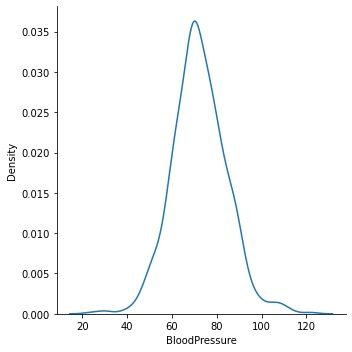

In [14]:
sns.displot(pima['BloodPressure'], kind='kde')
plt.show()

## What is the 'BMI' of the person having the highest 'Glucose'?

In [15]:
pima[pima['Glucose']==pima['Glucose'].max()]['BMI']

661    42.9
Name: BMI, dtype: float64

In [16]:
m1 = pima['BMI'].mean()  # mean
print(m1)
m2 = pima['BMI'].median()  # median
print(m2)
m3 = pima['BMI'].mode()[0]  # mode
print(m3)

32.45080515543619
32.0
32.0


## How many women's 'Glucose' levels are above the mean level of 'Glucose'?

In [17]:
pima[pima['Glucose']>pima['Glucose'].mean()].shape[0]

343

## How many women have their 'BloodPressure' equal to the median of 'BloodPressure' and their 'BMI' less than the median of 'BMI'?

In [18]:
len(pima[(pima['BloodPressure']==pima['BloodPressure'].median()) & (pima['BMI']<pima['BMI'].median())])

22

## Pairplot for the variables 'Glucose', 'SkinThickness', and 'DiabetesPedigreeFunction'.

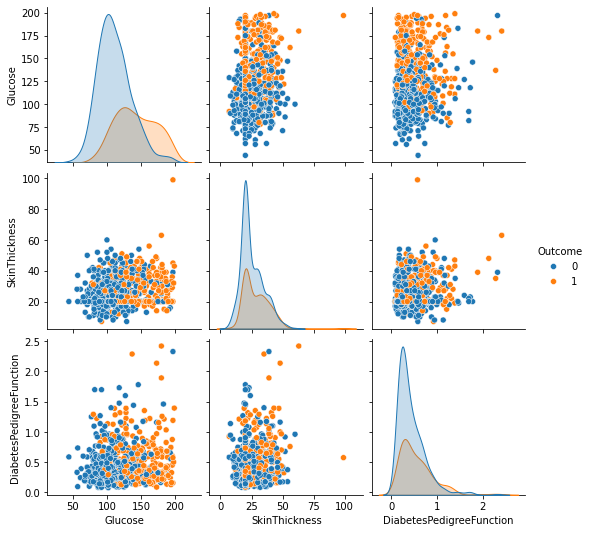

In [19]:
sns.pairplot(data=pima,vars=['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue='Outcome')
plt.show()

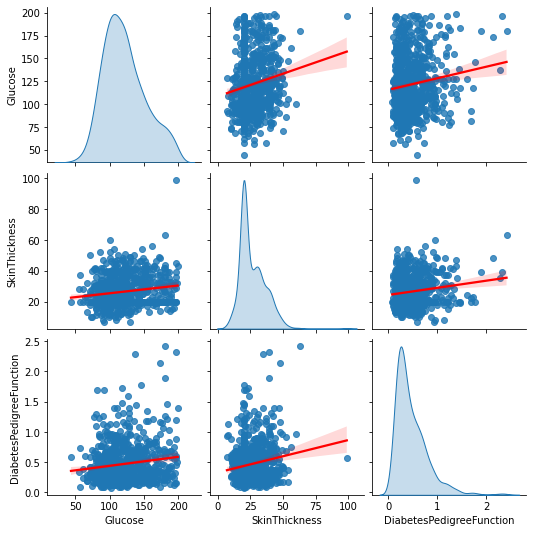

In [20]:
cols_to_plot = ['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction']
sns.pairplot(pima[cols_to_plot], kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})

## Scatterplot between 'Glucose' and 'Insulin'

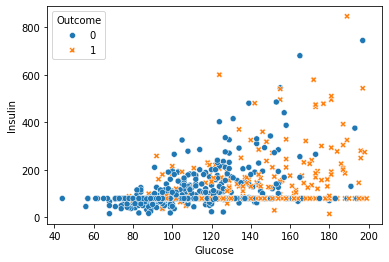

In [21]:
sns.scatterplot(x='Glucose',y='Insulin',data=pima,  hue = 'Outcome', style = 'Outcome')
plt.show()

<Axes: xlabel='Glucose', ylabel='Insulin'>

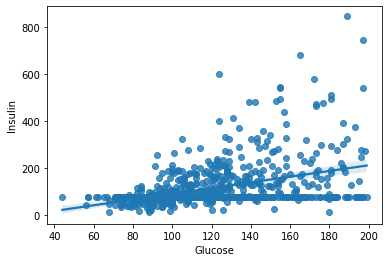

In [22]:
#Notes plot a trend line for observations
sns.regplot(x='Glucose',y='Insulin',data=pima)

## BoxPlot of Age

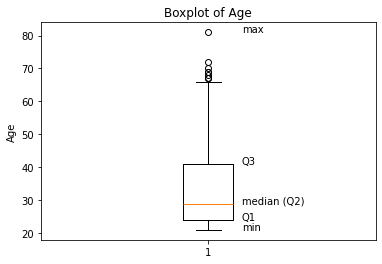

In [23]:
plt.boxplot(pima['Age'])
# add labels for five number summary
plt.text(x = 1.1, y = pima['Age'].min(), s ='min')
plt.text(x = 1.1, y = pima.Age.quantile(0.25), s ='Q1')
plt.text(x = 1.1, y = pima['Age'].median(), s ='median (Q2)')
plt.text(x = 1.1, y = pima.Age.quantile(0.75), s ='Q3')
plt.text(x = 1.1, y = pima['Age'].max(), s ='max')

plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

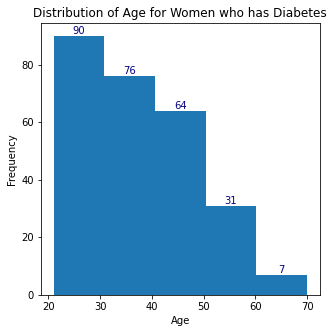

In [24]:
plt.figure(figsize=(5, 5))

values, bins, bars = plt.hist(pima[pima['Outcome']==1]['Age'], bins = 5)
plt.title('Distribution of Age for Women who has Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.bar_label(bars, fontsize=10, color='navy')

plt.show()

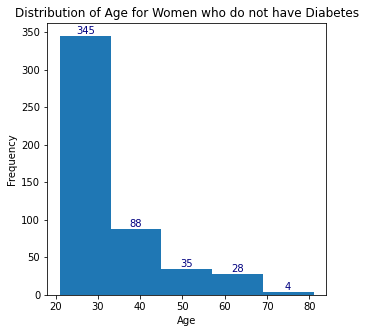

In [25]:
plt.figure(figsize=(5, 5))

values, bins, bars = plt.hist(pima[pima['Outcome']==0]['Age'], bins = 5)
plt.title('Distribution of Age for Women who do not have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.bar_label(bars, fontsize=10, color='navy')

plt.show()

## IQR

In [26]:
Q1 = pima.quantile(0.25)
Q3 = pima.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                  5.0000
Glucose                     40.5000
BloodPressure               16.0000
SkinThickness               12.0000
Insulin                     48.2500
BMI                          9.1000
DiabetesPedigreeFunction     0.3825
Age                         17.0000
Outcome                      1.0000
dtype: float64


## visualize the correlation matrix

In [27]:
corr_matrix = pima.iloc[:,0:8].corr()

corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.128022,0.208987,0.009393,-0.018780,0.021546,-0.033523,0.544341
Glucose,0.128022,1.000000,0.219765,0.158060,0.396137,0.231464,0.137158,0.266673
BloodPressure,0.208987,0.219765,1.000000,0.130403,0.010492,0.281222,0.000471,0.326791
SkinThickness,0.009393,0.158060,0.130403,1.000000,0.245410,0.532552,0.157196,0.020582
Insulin,-0.018780,0.396137,0.010492,0.245410,1.000000,0.189919,0.158243,0.037676
BMI,0.021546,0.231464,0.281222,0.532552,0.189919,1.000000,0.153508,0.025748
DiabetesPedigreeFunction,-0.033523,0.137158,0.000471,0.157196,0.158243,0.153508,1.000000,0.033561
Age,0.544341,0.266673,0.326791,0.020582,0.037676,0.025748,0.033561,1.000000


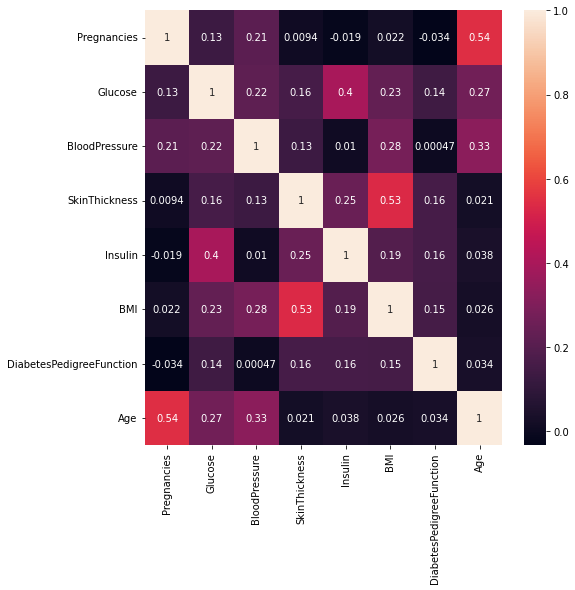

In [28]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.show()